In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from cf_matrix import make_confusion_matrix

In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('./diabetes.csv', header=None, names=col_names)
pima = pima[1:]

In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


Выделяем целевую переменную и факторы

In [5]:
Y = pima.label
X = pima.drop(['label'], axis=1)

Разделяем набор данных на обучающую и тестовую выборки

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

Строим модель логистической регрессии

In [7]:
cls = LogisticRegression()

Обучим наш классификатор на обучающей выборке

In [8]:
cls.fit(x_train, y_train)

C:\Users\alexv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Сделаем предсказания по нашему классификатору на тестовой выборке для оценки эффективности полученной модели

In [9]:
y_pred = cls.predict(x_test)

Оценим эффективность предсказания тестовой выборки при помощи матрицы классификации:

In [10]:
my_matrix = metrics.confusion_matrix(y_test, y_pred)
my_matrix

array([[89, 10],
       [24, 31]], dtype=int64)

Text(0.5, 15.0, 'Предсказанные значения')

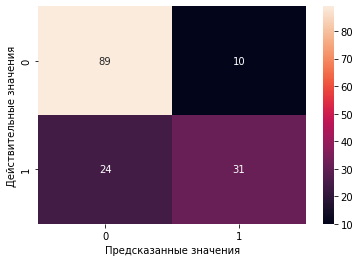

In [12]:
%matplotlib inline

class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

89 - это кол-во тех людей, у которых нет диабета и модель предсказала это верно
31 - это кол-во тех людей, у которых есть диабет и модель предсказала это верно
24 - это кол-во тех людей, у которых в действительности есть диабет, но модель предсказала, что его нет
10 - это кол-во людей, у которых нет диабета, но модель предсказала, что он есть

89 - true negative, классификатор верно утверждает, что объект не принадлежит к рассматриваемому классу.
24 -   false negative, классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.
31 -  true positive, классификатор верно отнёс объект к рассматриваемому классу.
10 -  false positive, классификатор неверно отнёс объект к рассматриваемому классу.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [13]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [14]:
TP = my_matrix[1][1]
TN = my_matrix[0][0]
FP = my_matrix[0][1]
FN = my_matrix[1][0]

#### Метрика достоверности предсказания

In [15]:
metrics.accuracy_score(y_test, y_pred)

0.7792207792207793

Accuracy = (TN + TP)/(TN + FP + TP + FN)

In [16]:
(TN + TP)/(TN + FP + TP + FN)

0.7792207792207793

#### Метрика точности

In [17]:
metrics.precision_score(y_test, y_pred, pos_label="1")

0.7560975609756098

Precision = TP / (TP + FP)

In [18]:
TP / (TP + FP)

0.7560975609756098

#### Метрика полноты

In [19]:
metrics.recall_score(y_test, y_pred, pos_label="1")

0.5636363636363636

Recall = TP / (TP + FN)

In [20]:
 TP / (TP + FN)

0.5636363636363636